In [ ]:
#Importing all required libraries
import tensorflow as tf
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import load_img
#Augmentation
lt = [cv2.ROTATE_180,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_90_CLOCKWISE]
def brightness(img):
    value = random.uniform(0.5, 2)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255] = 255
    hsv[:,:,2] = hsv[:,:,2]*value
    hsv[:,:,2][hsv[:,:,2]>255]= 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pathlib
import glob
directory=pathlib.Path("/content/drive/My Drive/objects")
resultant="/content/augmentedimages"
items=os.listdir(directory)
classes=[]
count=0
images=[]
labels=[]
for i in items:
    i1=0
    print(i)
    classes.append(i)
    path1=f"{directory}/{i}"
    a=random.randint(5,10)
    img=cv2.imread(path1)
    img=cv2.resize(img,(224,224))
    k=i.split(".")[0]
    cv2.imwrite(f"{resultant}\{k}{i1}.png",img)
    i1+=1
    while a!=0:
      img=cv2.rotate(img,lt[random.randint(0,2)])
      images.append(img)
      cv2.imwrite(f"{resultant}\{k}{i1}.png",img)
      i1+=1
      labels.append(count)
      if a%2==0:
        img = brightness(img)
        images.append(img)
        cv2.imwrite(f"{resultant}\{k}{i1}.png",img)
        i1+=1
        labels.append(count)
      a-=1
    count+=1
images=np.array(images)
labels=np.array(labels)


marker.jpg
feather.jpg
gum.jpg
ball.jpg
sharpner.jpg
bottle.jpg
IMG_20240911_093530.jpg
mobile.jpg
nailcutter.jpg
speaker.jpg
key.jpg
charger.jpg
surf.jpg
cup.jpg
pencil.jpg
pods.jpg
mouse.jpg
ponds.jpg
balm.jpg
watch.jpg
spoon.jpg
lock.jpg
facewash.jpg
hairoil.jpg
stapler.jpg


In [ ]:
images.shape

(275, 224, 224, 3)

In [ ]:
from keras.layers import Dense,Dropout, Flatten
from tensorflow.keras.models import *
from keras.applications import ResNet50
#Using ResNet50 pretrained model
model=ResNet50(weights="imagenet",include_top=False,input_shape=(224,224,3))
for i in model.layers:
  i.trainable=False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
len(model.layers)

175

In [ ]:
model.summary()


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
from keras.layers import GlobalAveragePooling2D # Correct import statement for GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Dense

# Create a new Sequential model
transferresnet = Sequential()
#adding pretrained model
transferresnet.add(model)
#adding customer layers
transferresnet.add(GlobalAveragePooling2D())
transferresnet.add(Dense(512,activation="relu"))
transferresnet.add(Dense(128,activation="relu"))
transferresnet.add(Dense(25,activation="softmax"))

# Now you can build the model with the desired input shape
transferresnet.build(input_shape=(None, 224, 224, 3))

In [ ]:
len(transferresnet.layers)


5

In [ ]:
transferresnet.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,704,399 (94.24 MB)

 Trainable params: 1,116,687 (4.26 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    print("call")
    if(logs.get('accuracy')>.99):
      print("\nReached %2.2f%% accuracy, so stopping training"%(99))
      self.model.stop_training=True
callbacks=myCallback()


In [ ]:
transferresnet.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
transferresnet.fit(images,labels,epochs=100,callbacks=[callbacks])

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3486 - loss: 2.6831call
9/9 ━━━━━━━━━━━━━━━━━━━━ 59s 5s/step - accuracy: 0.3720 - loss: 2.5961
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9954 - loss: 0.0907call

Reached 99.00% accuracy, so stopping training
9/9 ━━━━━━━━━━━━━━━━━━━━ 87s 6s/step - accuracy: 0.9955 - loss: 0.0878


In [ ]:
transferresnet.evaluate(images,labels)

9/9 ━━━━━━━━━━━━━━━━━━━━ 61s 6s/step - accuracy: 0.9984 - loss: 0.0110


[0.01430919673293829, 0.996363639831543]

In [ ]:
#Prediction function with labels
def predict(i,transferVGG,labels):
  path1=f"{directory}/{i}"
  img=cv2.imread(path1)
  img=cv2.resize(img,(224,224))
  a=np.argmax(transferresnet.predict(np.array([img])))
  img=cv2.putText(img,labels[a],(25,25),cv2.FONT_HERSHEY_SIMPLEX,1,(225,225,0),3,cv2.LINE_AA)
  plt.imshow(img)

In [ ]:
classes

['marker.jpg',
 'feather.jpg',
 'gum.jpg',
 'ball.jpg',
 'sharpner.jpg',
 'bottle.jpg',
 'IMG_20240911_093530.jpg',
 'mobile.jpg',
 'nailcutter.jpg',
 'speaker.jpg',
 'key.jpg',
 'charger.jpg',
 'surf.jpg',
 'cup.jpg',
 'pencil.jpg',
 'pods.jpg',
 'mouse.jpg',
 'ponds.jpg',
 'balm.jpg',
 'watch.jpg',
 'spoon.jpg',
 'lock.jpg',
 'facewash.jpg',
 'hairoil.jpg',
 'stapler.jpg']

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


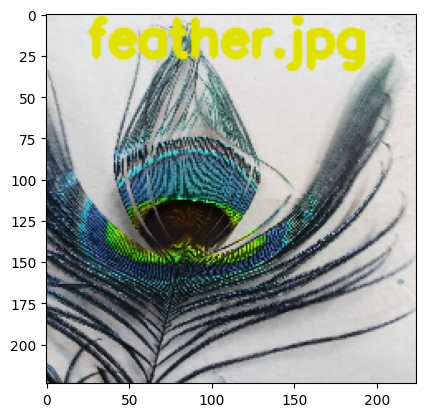

In [ ]:
predict("feather.jpg",transferresnet,classes)